In [3]:
import yfinance as yf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import datetime

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [55]:
import plotly.offline as py
# That's line needed if you use jupyter notebook (.ipynb):
py.init_notebook_mode(connected=True)

In [56]:
import plotly.graph_objects as go

In [66]:
def dataFrame(symbol, period, startdate, enddate):
    
    columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    tickerData = yf.Ticker(symbol)
    tickerDf = tickerData.history(period=period, start=startdate, end=enddate)
    
    return tickerDf[columns]    

In [89]:
today = datetime.date.today()
start = datetime.datetime(today.year-5,today.month,today.day)

In [90]:
today, start

(datetime.date(2020, 3, 26), datetime.datetime(2015, 3, 26, 0, 0))

In [91]:
tickerSymbol = 'GOOG'

In [92]:
df = dataFrame(tickerSymbol, '1d', start, today)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-03-26,556.06,557.37,549.14,553.65,1572600
2015-03-27,551.49,553.76,546.63,546.84,1897400
2015-03-30,550.11,551.95,546.67,550.52,1287500
2015-03-31,548.49,553.19,545.22,546.50,1588000
2015-04-01,547.10,549.63,538.02,541.07,1963000


In [93]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2020-03-19,1093.05,1157.97,1060.11,1115.29,3651100
2020-03-20,1135.72,1143.99,1065.49,1072.32,3601800
2020-03-23,1061.32,1071.32,1013.54,1056.62,4044100
2020-03-24,1103.77,1135.00,1090.62,1134.46,3344500
2020-03-25,1126.47,1148.90,1086.01,1102.49,4081500


In [71]:
def plotChart(df):
    plt.figure(figsize=(15,6))
    df['Close'].plot()
    plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Price', fontsize=16)
    
    for year in range(2015,2021):
        plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

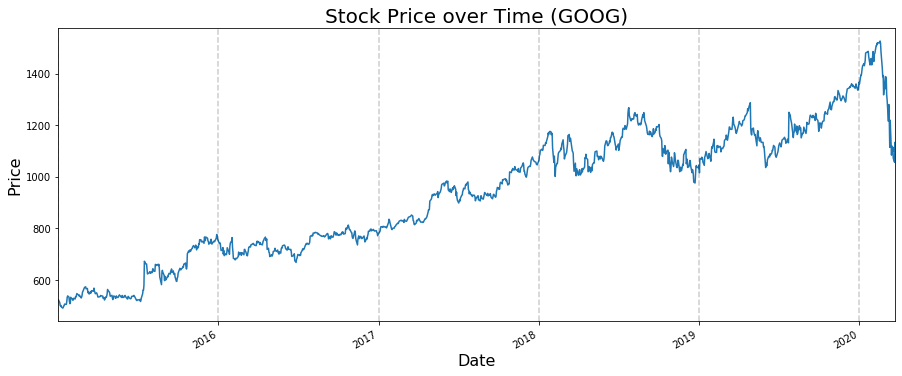

In [10]:
plotChart(df)

In [100]:
# https://towardsdatascience.com/python-stock-analysis-candlestick-chart-with-python-and-plotly-e619143642bb

tickerSymbol = 'NFLX'
today = datetime.date.today()
start = datetime.datetime(today.year-5,today.month,today.day)


def candleStick(symbol, startdate, enddate):
    tickerData = yf.Ticker(symbol)
    df = tickerData.history(period='1d', start=startdate, end=enddate)
    
    fig = go.Figure(data=[go.Candlestick(x=df.index,
                    open=df['Open'],
                    high=df['High'],
                    low=df['Low'],
                    close=df['Close'])])

    fig.update_layout(
        title= {
            'text': symbol,
          'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
          font=dict(
            family="Times New Roman",
            size=20,
            color="#7f7f7f"
        )
        )

    fig.show()

In [101]:
candleStick(tickerSymbol, start, today)

In [85]:
# https://plotly.com/~jackp/17421/plotly-candlestick-chart-in-python/#/
# Useful for volume bar and moving average
# Not for Plotly 4.x

INCREASING_COLOR = '#17BECF'
DECREASING_COLOR = '#7F7F7F'

colors = []

for i in range(len(df.Close)):
    if i != 0:
        if df.Close[i] > df.Close[i-1]:
            colors.append(INCREASING_COLOR)
        else:
            colors.append(DECREASING_COLOR)
    else:
        colors.append(DECREASING_COLOR)
